# **Project Name**    -  NETFLIX MOVIES AND TV SHOWS ANALYSIS



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

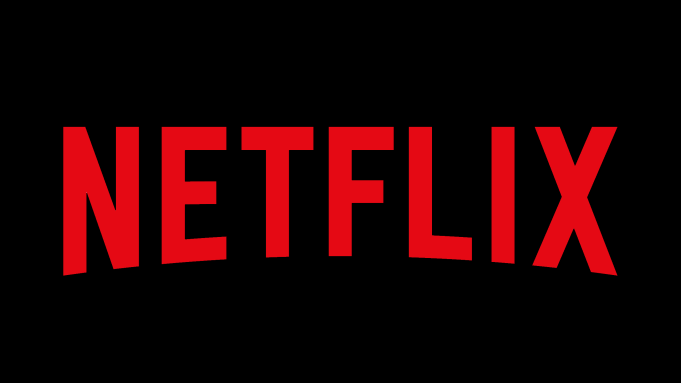






Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.




This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

https://github.com/Mostaqul143/Netflix-Movies-And-TV-Shows-Clustering

# **Problem Statement**


*This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.*

*In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.*

*Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.*

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset


df=pd.read_csv("Netflix.csv")

### Dataset First View

In [3]:
# Dataset First Look

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print(f"Number Of Rows {df.shape[0]}")
print(f"Number Of Columns {df.shape[1]}")

Number Of Rows 7787
Number Of Columns 12


### Dataset Information

In [5]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

num_missing = df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [8]:
#total null values
df.isnull().sum().sum()

3631

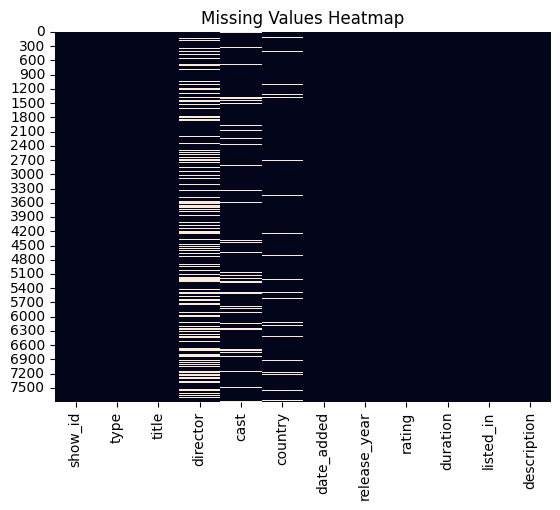

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are no duplicated values**

**There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values**

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

**show_id:** A unique identifier for each TV show or movie in the dataset.

**type:** Indicates whether the entry is a TV show or a movie.

**title:** The title of the TV show or movie.

**director:** The director(s) of the TV show or movie.

**cast:** The main cast or actors/actresses in the TV show or movie.

**country:** The country or countries where the TV show or movie was produced or filmed.

**date_added:** The date when the TV show or movie was added to Netflix.

**release_year:** The year when the TV show or movie was originally released.

**rating:** The content rating for the TV show or movie (e.g., PG-13, TV-MA, etc.).

**duration:** The duration or runtime of the TV show or movie.

**listed_in:** The genre or category of the TV show or movie.

**description:** A brief description or summary of the TV show or movie.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [13]:
# Handling the missing values

# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')





In [14]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset

df.dropna(subset=['date_added','rating'],inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

# Convert 'date_added' column to datetime


df['month'] = pd.DatetimeIndex(df['date_added']).month

# Display the updated DataFrame


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [17]:
type_counts=df['type'].value_counts()

print(type_counts)

type
Movie      5372
TV Show    2398
Name: count, dtype: int64


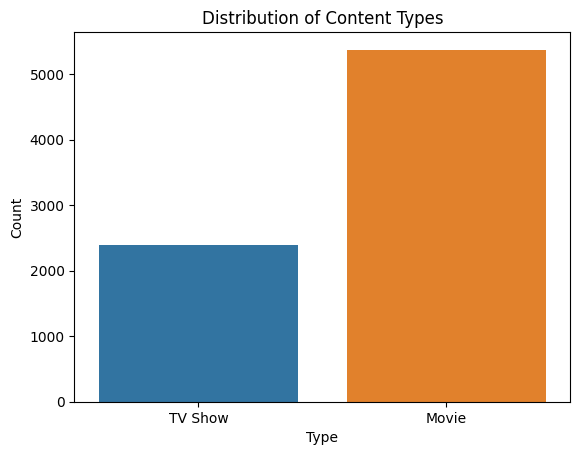

In [18]:
# Chart - 1 visualization code



# Plotting a bar graph 
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()



##### 1. Why did you pick the specific chart?

The specific chart chosen, a countplot, is suitable for visualizing the distribution of content types. It was selected because it allows for a quick comparison of the count or frequency of each content type (TV show or movie) using vertical bars. This chart effectively presents the information in a clear and concise manner, making it easy to understand the distribution of content types in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Netflix has 5372 movies and 2398 TV shows

There are more   number movies on Netflix than TV shows.

#### Chart - 2

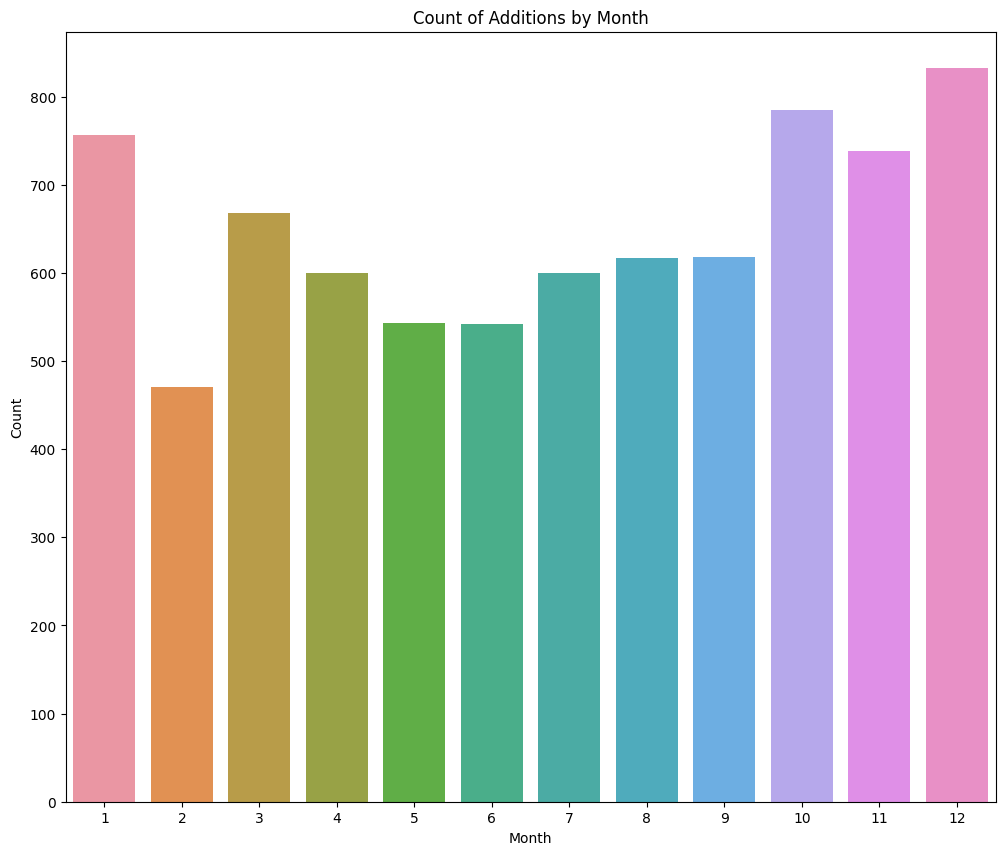

In [19]:
# Chart - 2 visualization code



plt.figure(figsize=(12, 10))
sns.countplot(x='month', data=df)

plt.title('Count of Additions by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen, a countplot, is suitable for visualizing the count of additions by month. It was selected because it provides a clear and concise representation of the distribution of additions across different months. By using vertical bars, the countplot allows for easy comparison between the months, making it intuitive to identify any monthly trends or patterns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

**From The Above Chart We Can See That :**

From October to January, Maximum number of movies and TV shows were added.

#### Chart - 3

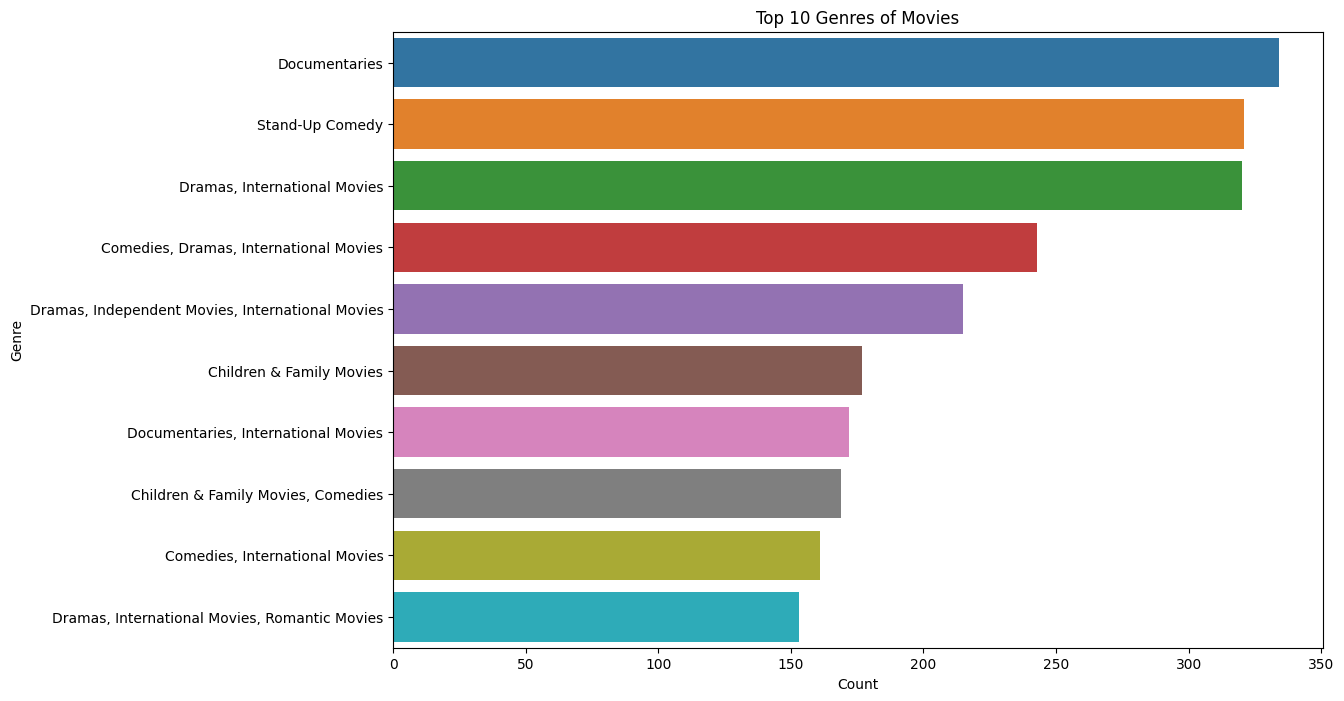

In [20]:
# Chart - 3 visualization code

#Analysing top10 genre of the movies


# Extract movies from the dataset
movies = df[df['type'] == 'Movie']

# Count the occurrences of each genre
genre_counts = movies['listed_in'].value_counts()

# Select the top 10 genres
top10_genres = genre_counts.head(10)

# Plot the distribution of the top 10 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_genres.values, y=top10_genres.index)
plt.title('Top 10 Genres of Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen, a bar plot, is suitable for visualizing the distribution of the top 10 movie genres. It was selected because it effectively presents the count of each genre in a visually appealing manner. The vertical bars allow for easy comparison between the genres, making it straightforward to identify the most popular genres among the movies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

**From The Above Chart We Can See That :**

Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

#### Chart - 4

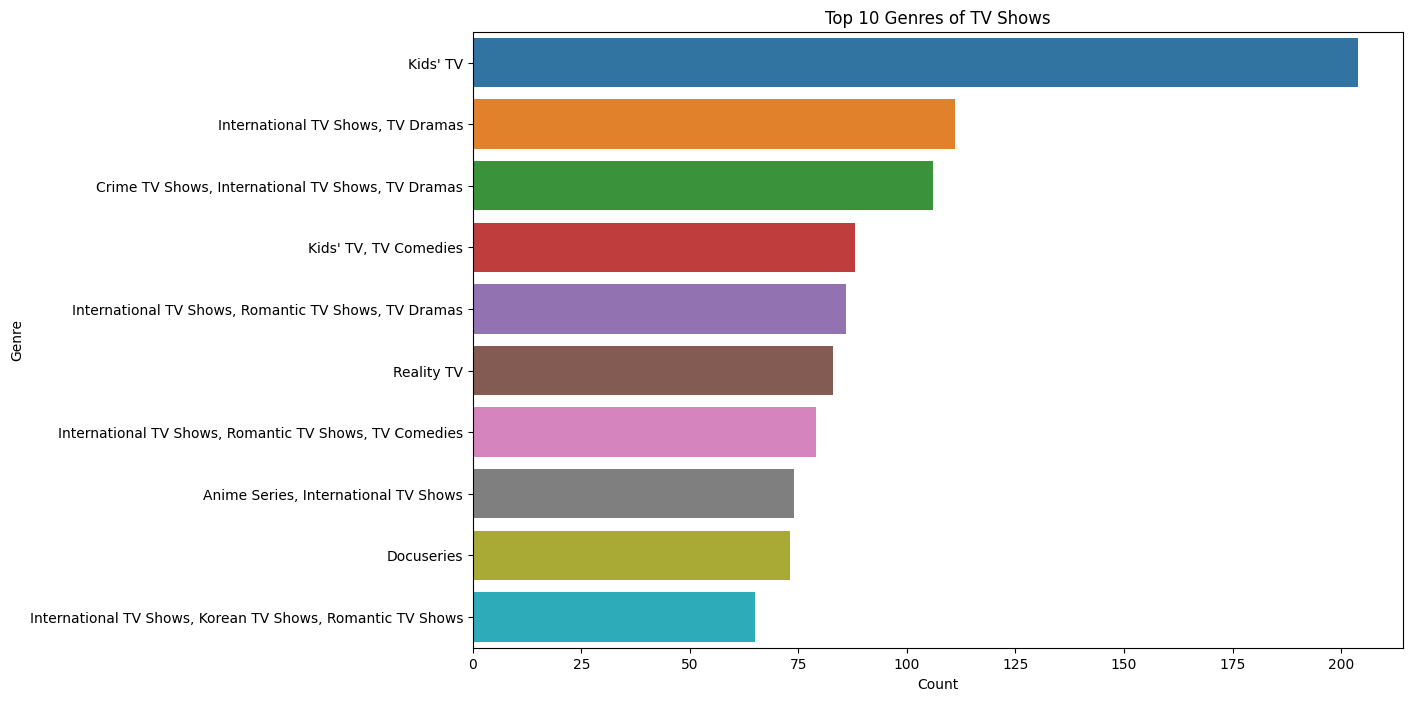

In [21]:
# Chart - 4 visualization code

#Analysing top10 genre of the TV Shows


# Extract TV shows from the dataset
tv_shows = df[df['type'] == 'TV Show']

# Count the occurrences of each genre
genre_counts = tv_shows['listed_in'].value_counts()

# Select the top 10 genres
top10_genres = genre_counts.head(10)

# Plot the distribution of the top 10 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_genres.values, y=top10_genres.index)
plt.title('Top 10 Genres of TV Shows')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()






##### 1. Why did you pick the specific chart?


The specific chart chosen, a bar plot, is suitable for visualizing the distribution of the top 10 TV show genres. It was selected because it effectively presents the count of each genre in a visually appealing manner. The vertical bars allow for easy comparison between the genres, making it straightforward to identify the most popular genres among the TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

**From The Above Chart We Can See That :**

kids tv is the top most  TV show genre in netflix

#### Chart - 5

In [22]:
#top_two countries where netflix is most popular

country=df['country'].value_counts().reset_index()
country

,country,count
0,United States,2546
1,India,923
2,Unknown,505
3,United Kingdom,396
4,Japan,224
...,...,...
677,"Russia, United States, China",1
678,"Italy, Switzerland, France, Germany",1
679,"United States, United Kingdom, Canada",1
680,"United States, United Kingdom, Japan",1


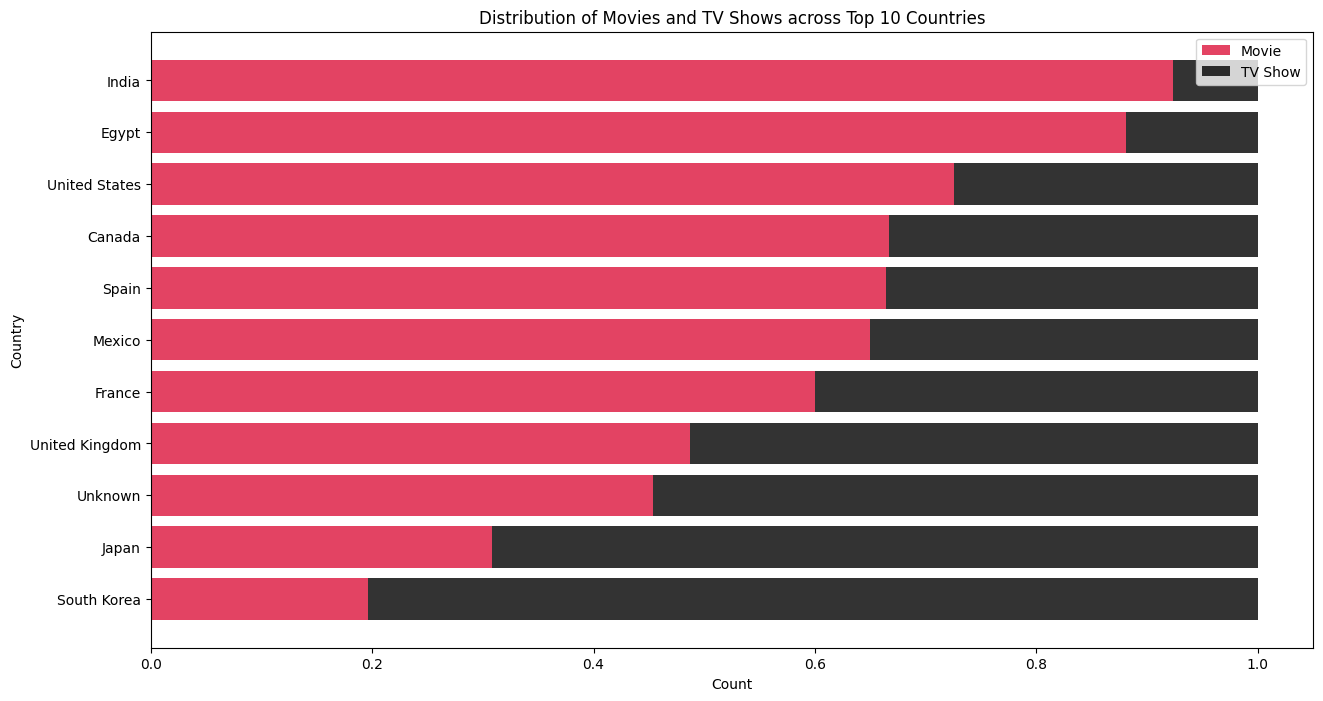

In [23]:
# Chart - 5 visualization code


# Plotting the Horizontal bar plot for top 10 countries and content split
country_order = df['country'].value_counts()[:11].index  # Get the top 10 countries with highest content counts
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]  # Group by country and count the occurrences of each content type
content_data['sum'] = content_data.sum(axis=1)  # Calculate the total count of content (movies and TV shows) for each country
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]  # Calculate the ratio of movies and TV shows for each country, sorted by the count of movies

# Plotting the barh
fig, ax = plt.subplots(1, 1, figsize=(15, 8))  # Create the figure and axes

# Plotting the horizontal bars for movies and TV shows
ax.barh(content_data_ratio.index, content_data_ratio['Movie'], color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], color='black', alpha=0.8, label='TV Show')

# Add labels and legends
ax.set_xlabel('Count')
ax.set_ylabel('Country')
ax.set_title('Distribution of Movies and TV Shows across Top 10 Countries')
ax.legend()

plt.show()  # Display the plot



##### 1. Why did you pick the specific chart?

The specific chart chosen, a horizontal bar plot, is suitable for visualizing the distribution of movies and TV shows across the top 10 countries in your dataset. It was selected because it allows for a clear comparison of the counts of movies and TV shows within each country. The horizontal orientation of the bars makes it easy to compare the relative proportions of movies and TV shows for each country.

##### 2. What is/are the insight(s) found from the chart?

**From The Chart We Can See That :**

INDIA has highest number of movies in netflix

## ***5. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [24]:
# Using the original dataset for clustering since

# it does not require handling missing values

Data = df.copy()



In [25]:
Data.fillna('',inplace=True)

In [26]:
# Combining all the clustering attributes into a single column

Data['clustering'] = (Data['director'] + ' ' + 
                                Data['cast'] +' ' + 
                                Data['country'] +' ' + 
                                Data['listed_in'] +' ' + 
                                Data['description'])

In [27]:
# Select the 100 number of clusters for the dataset 

Data['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies, Dramas, International Movies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

#### 1. Expand Contraction

In [28]:
# Expand Contraction

contraction_mapping = {
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "isn't": "is not",
    "aren't": "are not",
    "hasn't": "has not",
    "haven't": "have not",
}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contraction_mapping.get(word, word) for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Expand contractions in the "describe" column
Data['clustering'] = Data['clustering'].apply(expand_contractions)

# Print the updated "describe" column
print(Data['clustering'][100])


Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies, Dramas, International Movies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system.


#### 2. Lower Casing

In [29]:
# Lower Casing

# Lowercase the text in the "describe" column
Data['clustering'] = Data['clustering'].str.lower()

# Print the updated "describe" column
print(Data['clustering'][100])

rajkumar hirani aamir khan, kareena kapoor, madhavan, sharman joshi, omi vaidya, boman irani, mona singh, javed jaffrey india comedies, dramas, international movies while attending one of india's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system.


#### 3. Removing Punctuations

In [30]:
# Remove Punctuations

# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [31]:
Data['clustering']=Data['clustering'].apply(remove_punctuation)

# Print the updated "description" column
print(Data['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies while attending one of indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system


#### 4. Removing Stopwords

In [32]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [33]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stopwords_set = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    words_without_stopwords = [word for word in words if word.lower() not in stopwords_set]
    text_without_stopwords = ' '.join(words_without_stopwords)
    return text_without_stopwords




[nltk_data] Downloading package stopwords to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Remove stopwords from the "description" column
Data['clustering'] = Data['clustering'].apply(remove_stopwords)

# Print the updated "description" column
print(Data['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


#### 6. Tokenization

In [35]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize

# Download required resources if not already downloaded
nltk.download('punkt')

# Function to perform tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


[nltk_data] Downloading package punkt to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:

# Tokenize the text in the "description" column
Data['clustering'] = Data['clustering'].apply(tokenize_text)

# Print the updated "description" column
print(Data['clustering'][100])


['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'dramas', 'international', 'movies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


#### 8. Text Normalization

In [37]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)


import nltk
from nltk.stem import WordNetLemmatizer

# Download required resources if not already downloaded
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens










[nltk_data] Downloading package wordnet to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
# Lemmatize the tokenized text in the "description" column
Data['clustering'] = Data['clustering'].apply(lemmatize_text)

# Print the updated "description" column
print(Data['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedy', 'drama', 'international', 'movie', 'attending', 'one', 'india', 'premier', 'college', 'three', 'miserable', 'engineering', 'student', 'best', 'friend', 'struggle', 'beat', 'school', 'draconian', 'system']


##### Which text normalization technique have you used and why?

I chose lemmatization over other techniques like stemming because lemmatization produces more meaningful and linguistically accurate lemmas. Unlike stemming, lemmatization takes into account the context and part-of-speech of the words, resulting in lemmas that are closer to the actual word forms found in dictionaries. This helps in maintaining the interpretability and semantic integrity of the text.

By using lemmatization, I aimed to standardize the words in the "description" column to their base form, which can improve text analysis tasks such as keyword extraction, topic modeling, and sentiment analysis.

#### 10. Text Vectorization

In [39]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens into a single string
Data['clustering'] = Data['clustering'].apply(' '.join)

#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=20000)
X_tfidf = tfidfmodel.fit_transform(Data['clustering'])
X_tfidf.shape

(7770, 20000)

In [40]:
# convert X into array form for clustering
X = X_tfidf.toarray() 

In [41]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

I chose TF-IDF vectorization for its ability to capture the importance of a term based on its frequency within a specific document and its rarity across the entire collection of documents. This approach helps to highlight the significance of specific terms that are unique or distinctive to a particular document, while downplaying commonly occurring terms that might not carry much discriminatory power.

### 11. Dimesionality Reduction

**Reduceing Diemensionality using PCA**

In [42]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)



PCA(random_state=40)

In [43]:
# reducing the dimensions to 4000 using pca

pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [44]:
# transformed features
x_pca = pca.transform(X)

In [45]:
# shape of transformed vectors
x_pca.shape

(7770, 4000)

## ***7. ML Model Implementation***

### ML Model - 1- KMEAN

Text(0, 0.5, 'WCSS')

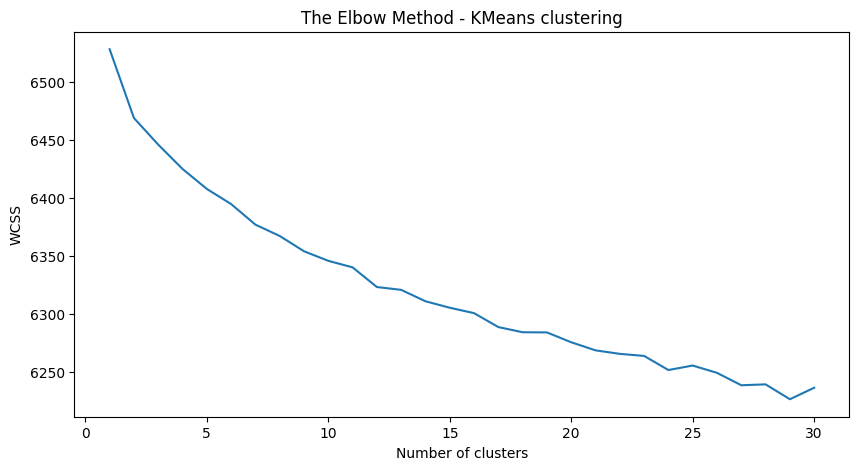

In [46]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [47]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,31):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(x_pca)
    y1 = model.predict(x_pca)
    score = silhouette_score(x_pca,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))


cluster: 2 	 Sillhoute: 0.0054
cluster: 3 	 Sillhoute: 0.0063
cluster: 4 	 Sillhoute: 0.0078
cluster: 5 	 Sillhoute: -0.0006
cluster: 6 	 Sillhoute: 0.0007
cluster: 7 	 Sillhoute: 0.0016
cluster: 8 	 Sillhoute: 0.0024
cluster: 9 	 Sillhoute: 0.0028
cluster: 10 	 Sillhoute: 0.0031
cluster: 11 	 Sillhoute: 0.0041
cluster: 12 	 Sillhoute: 0.0046
cluster: 13 	 Sillhoute: 0.0057
cluster: 14 	 Sillhoute: 0.0046
cluster: 15 	 Sillhoute: 0.0051
cluster: 16 	 Sillhoute: 0.0058
cluster: 17 	 Sillhoute: 0.0062
cluster: 18 	 Sillhoute: 0.0059
cluster: 19 	 Sillhoute: 0.0060
cluster: 20 	 Sillhoute: 0.0067
cluster: 21 	 Sillhoute: 0.0059
cluster: 22 	 Sillhoute: 0.0063
cluster: 23 	 Sillhoute: 0.0069
cluster: 24 	 Sillhoute: 0.0069
cluster: 25 	 Sillhoute: 0.0065
cluster: 26 	 Sillhoute: 0.0054
cluster: 27 	 Sillhoute: 0.0041
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0070
cluster: 30 	 Sillhoute: 0.0070


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

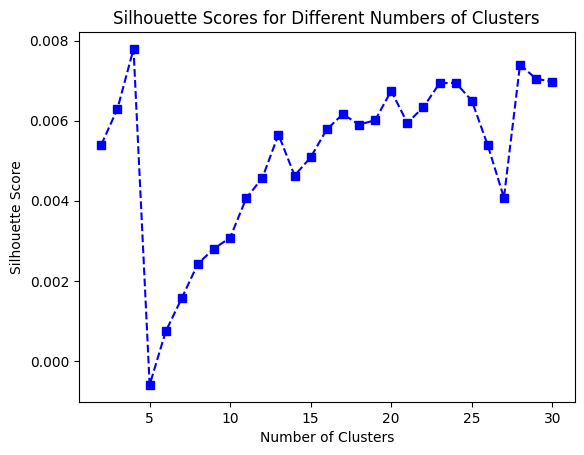

In [48]:
# Visualizing evaluation Metric Score chart

#Plotting Sillhoute's score

plt.plot(range(2, 31), sill, 'bs--')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [64]:
#training the K-means model on a dataset 
 
kmeans = KMeans(n_clusters= 4, init='k-means++', random_state= 42)  
kmeans.fit(x_pca)

KMeans(n_clusters=4, random_state=42)

In [66]:
# Adding a kmeans cluster number attribute
Data['kmeans_cluster'] = kmeans.labels_

In [67]:
#Evaluate the silhouette score

score = silhouette_score(x_pca, kmeans.labels_)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007588719989530334


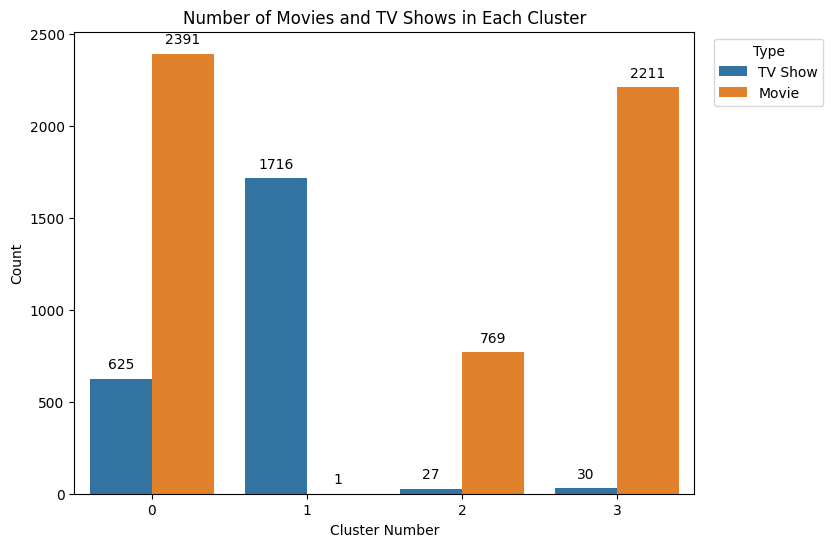

In [82]:
# Number of movies and tv shows in each cluster

# Plotting the count of movies and TV shows in each cluster
plt.figure(figsize=(8, 6))
q = sns.countplot(x='kmeans_cluster', hue='type', data=Data)
plt.title('Number of Movies and TV Shows in Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Count')

# Display count values on top of each bar
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Type', loc='best', bbox_to_anchor=(1.02, 1.0))

plt.show()


cluster 0 has the highest number of datapoints

### ML Model - 2 - HIERARCHICAL CLUSTERING

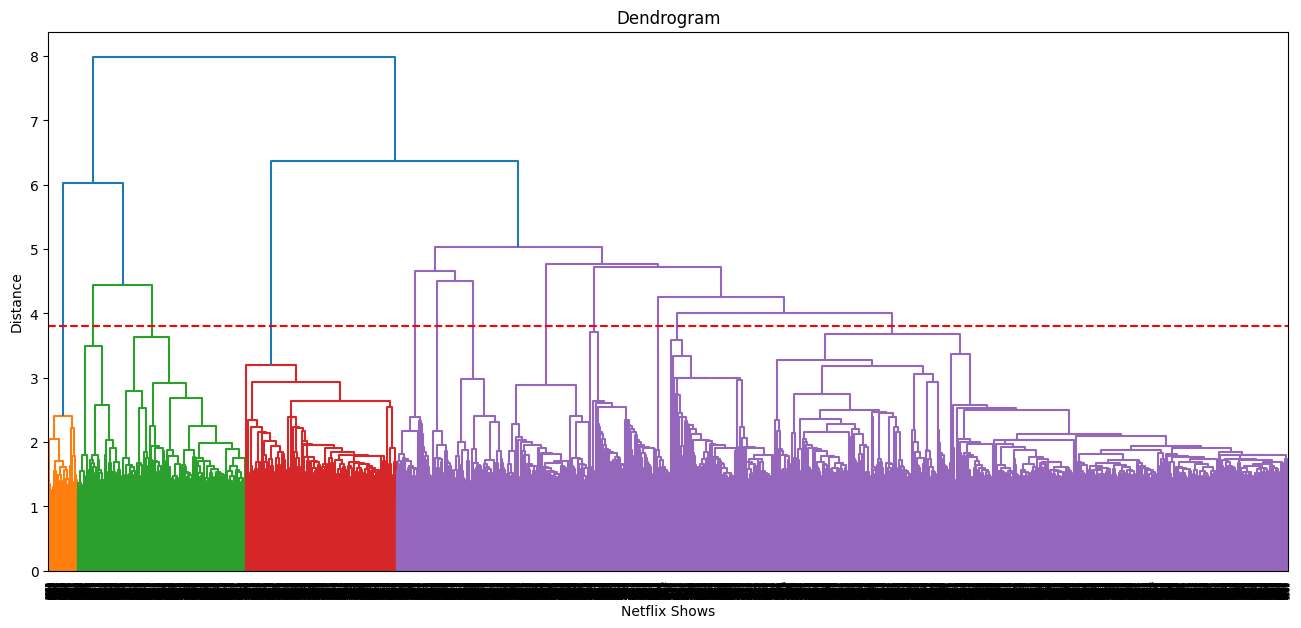

In [81]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [83]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([ 2,  9, 10, ...,  2,  1, 11], dtype=int64)

In [85]:
# Adding a kmeans cluster number attribute
Data['hierarchical_cluster'] = hierarchical.labels_

In [86]:
Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,clustering,kmeans_cluster,hierarchical_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,unknown joão miguel bianca comparato michel go...,1,2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,jorge michel grau demián bichir héctor bonilla...,3,9
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,gilbert chan tedd chan stella chung henley hii...,3,10
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,shane acker elijah wood john c reilly jennifer...,0,2
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,robert luketic jim sturgess kevin spacey kate ...,0,2


In [90]:
# Calculate the silhouette score

silhouette_avg = silhouette_score(x_pca, hierarchical.labels_)
print("Silhouette Score for Hierarchical Clustering:", silhouette_avg)

Silhouette Score for Hierarchical Clustering: 0.0005076141771231671


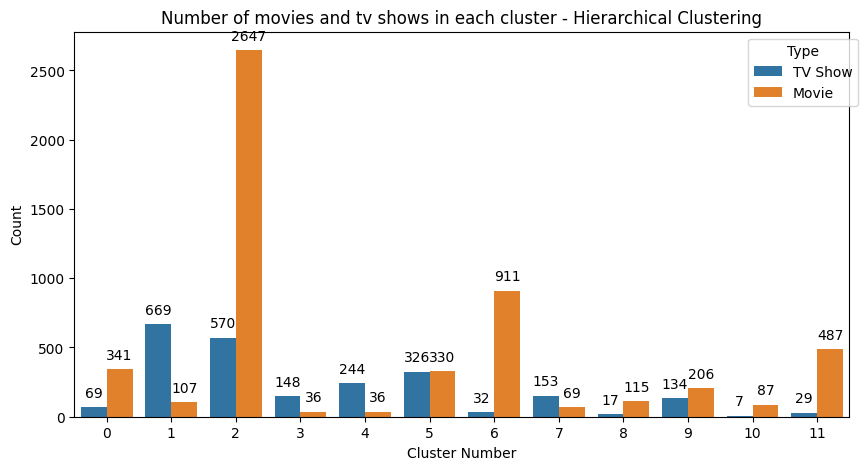

In [88]:
# Number of movies and tv shows in each cluster

# Plotting the count of movies and TV shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=Data, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
plt.xlabel('Cluster Number')
plt.ylabel('Count')

# Display count values on top of each bar
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Type', loc='best', bbox_to_anchor=(1.02, 1.0))

plt.show()


# **Conclusion**

*   **In this project, we worked on a text clustering problem where in we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.**

*   **The dataset contained about 7787 records, and 12 attributes. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).**

*   **It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.**

*   **Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.**


*    **It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.**


*   **Through TFIDF Vectorization, we created a total of 20000 attributes,We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis**


*   **Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.**



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [52]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [53]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***